# Competition:TravelPackagePrediction

##### *  Input Data -tour_package.csv

#Context
 
"Visit with us". company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

#### Problem
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [4]:
data=pd.read_csv('tour_package.csv')
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


- There are 4888 rows and 20 columns.

###### -             Data Dictionary


- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer
- Customer interaction data:

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

## I. Data Preprocessing

In [5]:
data.drop('CustomerID',axis=1,inplace=True)


####  Checking the basic details of the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [10]:
data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [15]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [16]:
data.nunique()

ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [17]:
for i in data.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in Age are :
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name

* Majority of the customers has chosen Package.
* In Gender,there are 3 values-Male,Female and Fe male. Female and Fe male should be taken as same.
* 3 star property is prefered by customers
* Most of the customers are from Tier1 cities
* Most of the customers opted Basic in ProductPitched.

### 1. Fill in all the missing values present in all the columns in the dataset

In [18]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [19]:
data['Gender']=data['Gender'].replace('Fe Male','Female')
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [20]:
data["Age"] = data["Age"].replace(np.NaN, data["Age"].median())
data["NumberOfFollowups"] = data["NumberOfFollowups"].replace(np.NaN, data["NumberOfFollowups"].median())
data["DurationOfPitch"] = data["DurationOfPitch"].replace(np.NaN, data["DurationOfPitch"].median())
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].replace(np.NaN, data["PreferredPropertyStar"].median())
data["NumberOfTrips"] = data["NumberOfTrips"].replace(np.NaN, data["NumberOfTrips"].median())
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].replace(np.NaN, data["NumberOfChildrenVisiting"].median())
data["MonthlyIncome"] = data["MonthlyIncome"].replace(np.NaN,data["MonthlyIncome"].mean())

In [21]:
data["TypeofContact"].fillna('Self Enquiry')

0          Self Enquiry
1       Company Invited
2          Self Enquiry
3       Company Invited
4          Self Enquiry
             ...       
4883       Self Enquiry
4884    Company Invited
4885       Self Enquiry
4886       Self Enquiry
4887       Self Enquiry
Name: TypeofContact, Length: 4888, dtype: object

In [ ]:
data.isnull().sum()

*No null values

In [22]:
category_columns = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact']
data[category_columns] = data[category_columns].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

### 2. Checking and handling outliers 

In [23]:
data.describe()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,37.547259,15.362930,2.905074,3.711129,3.577946,3.229746,3.078151,1.184738,23619.853491
std,9.104795,8.316166,0.724891,0.998271,0.797005,1.822769,1.365792,0.852323,5250.862747
min,18.000000,5.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,20485.000000
50%,36.000000,13.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,22655.000000
75%,43.000000,19.000000,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,25424.750000
max,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,5.000000,3.000000,98678.000000


In [24]:
Q1 = data.quantile(0.25)             
Q3 = data.quantile(0.75)

In [25]:
IQR = Q3 - Q1   

In [26]:
lower_limit=Q1-1.5*IQR                        
upper_limit=Q3+1.5*IQR

In [27]:
((data.select_dtypes(include=['float64','int64'])<lower_limit) | (data.select_dtypes(include=['float64','int64'])>upper_limit)).sum()

Age                           0
DurationOfPitch             112
NumberOfPersonVisiting        3
NumberOfFollowups           312
PreferredPropertyStar         0
NumberOfTrips               109
PitchSatisfactionScore        0
NumberOfChildrenVisiting      0
MonthlyIncome               375
dtype: int64

###### i.checking the outlier in 'MonthlyIncome' column

Text(0.5, 1.0, 'Box plot  of MonthlyIncome  (with outliers)')

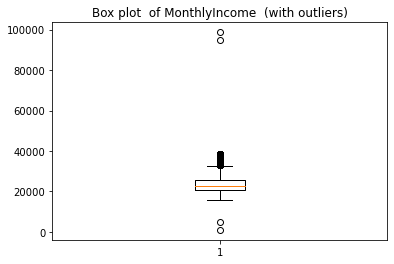

In [28]:
plt.boxplot(data['MonthlyIncome'])
plt.title('Box plot  of MonthlyIncome  (with outliers)')

In [32]:
data.loc[data['MonthlyIncome'].gt(upper_limit['MonthlyIncome'])| data['MonthlyIncome'].lt(lower_limit['MonthlyIncome']) ].index

Int64Index([], dtype='int64')

Text(0.5, 1.0, 'Box plot  of MonthlyIncome  (without outliers)')

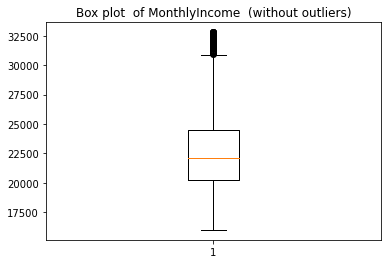

In [41]:
data.drop(index=data.loc[data['MonthlyIncome'].gt(upper_limit['MonthlyIncome'])| data['MonthlyIncome'].lt(lower_limit['MonthlyIncome'])].index,inplace=True)
plt.boxplot(data['MonthlyIncome'])
plt.title('Box plot  of MonthlyIncome  (without outliers)')

* All the outliers are removed from MonthlyIncome.

###### ii. checking 'NumberOfTrips' column

Text(0.5, 1.0, 'Box plot  of NumberOfTrips  (with outliers)')

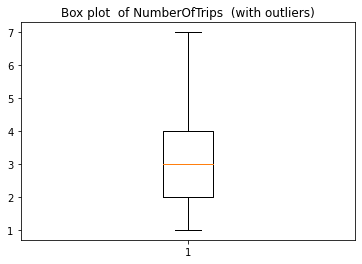

In [42]:
plt.boxplot(data['NumberOfTrips'])
plt.title('Box plot  of NumberOfTrips  (with outliers)')

In [43]:
data.loc[data['NumberOfTrips'].gt(upper_limit['NumberOfTrips'])| data['NumberOfTrips'].lt(lower_limit['NumberOfTrips']) ].index

Int64Index([], dtype='int64')

Text(0.5, 1.0, 'Box plot  of NumberOfFollowups  (without outliers)')

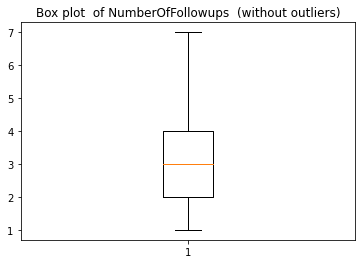

In [44]:
data.drop(index=data.loc[data['NumberOfTrips'].gt(upper_limit['NumberOfTrips'])| data['NumberOfTrips'].lt(lower_limit['NumberOfTrips']) ].index,inplace=True)
plt.boxplot(data['NumberOfTrips'])
plt.title('Box plot  of NumberOfFollowups  (without outliers)')

###### iii. checking 'DurationOfPitch' column

Text(0.5, 1.0, 'Box plot  of DurationOfPitch  (with outliers)')

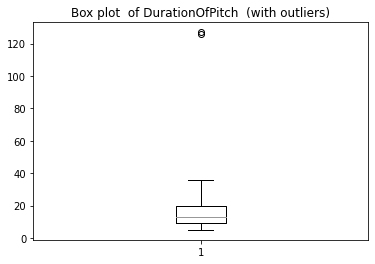

In [45]:
plt.boxplot(data['DurationOfPitch'])# checking 'Pclass' column
plt.title('Box plot  of DurationOfPitch  (with outliers)')

In [ ]:
data.loc[data['DurationOfPitch'].gt(upper_limit['DurationOfPitch'])| data['DurationOfPitch'].lt(lower_limit['DurationOfPitch']) ].index

Text(0.5, 1.0, 'Box plot  of DurationOfPitch  (after handling outliers)')

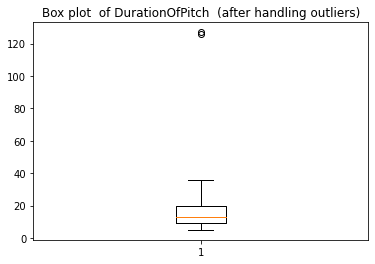

In [49]:
plt.boxplot(data['DurationOfPitch'])
plt.title('Box plot  of DurationOfPitch  (after handling outliers)')

- The values in 'DurationOfPitch' outside the lower and upper limits are removed.

In [51]:
integer_columns = ['ProdTaken', 'OwnCar', 'Passport',
            'CityTier']
data[integer_columns] = data[integer_columns].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4410 non-null   int64   
 1   Age                       4410 non-null   float64 
 2   TypeofContact             4385 non-null   category
 3   CityTier                  4410 non-null   int64   
 4   DurationOfPitch           4410 non-null   float64 
 5   Occupation                4410 non-null   category
 6   Gender                    4410 non-null   category
 7   NumberOfPersonVisiting    4410 non-null   int64   
 8   NumberOfFollowups         4410 non-null   float64 
 9   ProductPitched            4410 non-null   category
 10  PreferredPropertyStar     4410 non-null   float64 
 11  MaritalStatus             4410 non-null   category
 12  NumberOfTrips             4410 non-null   float64 
 13  Passport                  4410 non-null   int64 

#### Correlation matrix and pairplot

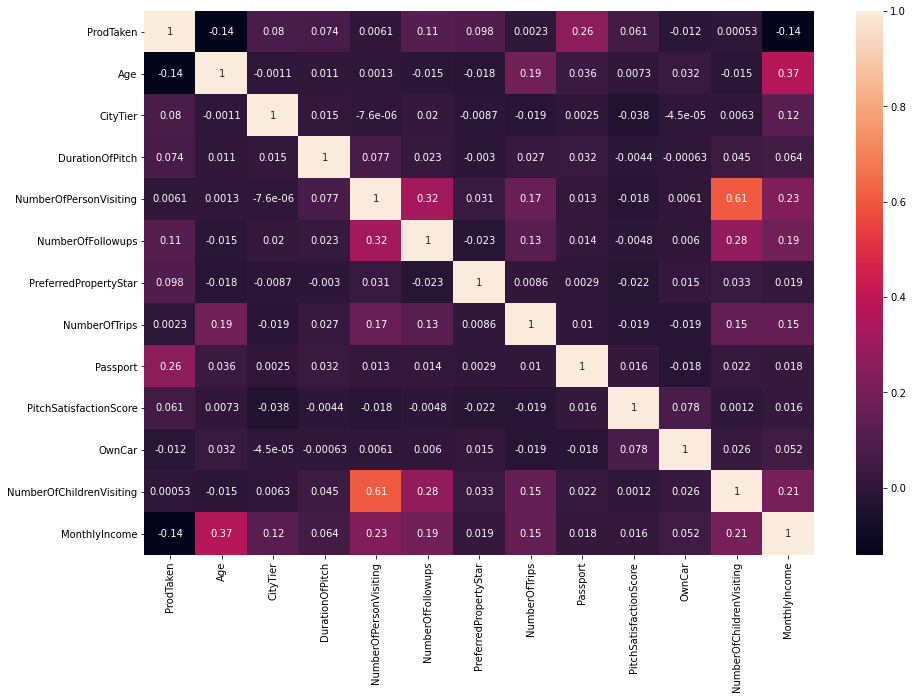

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

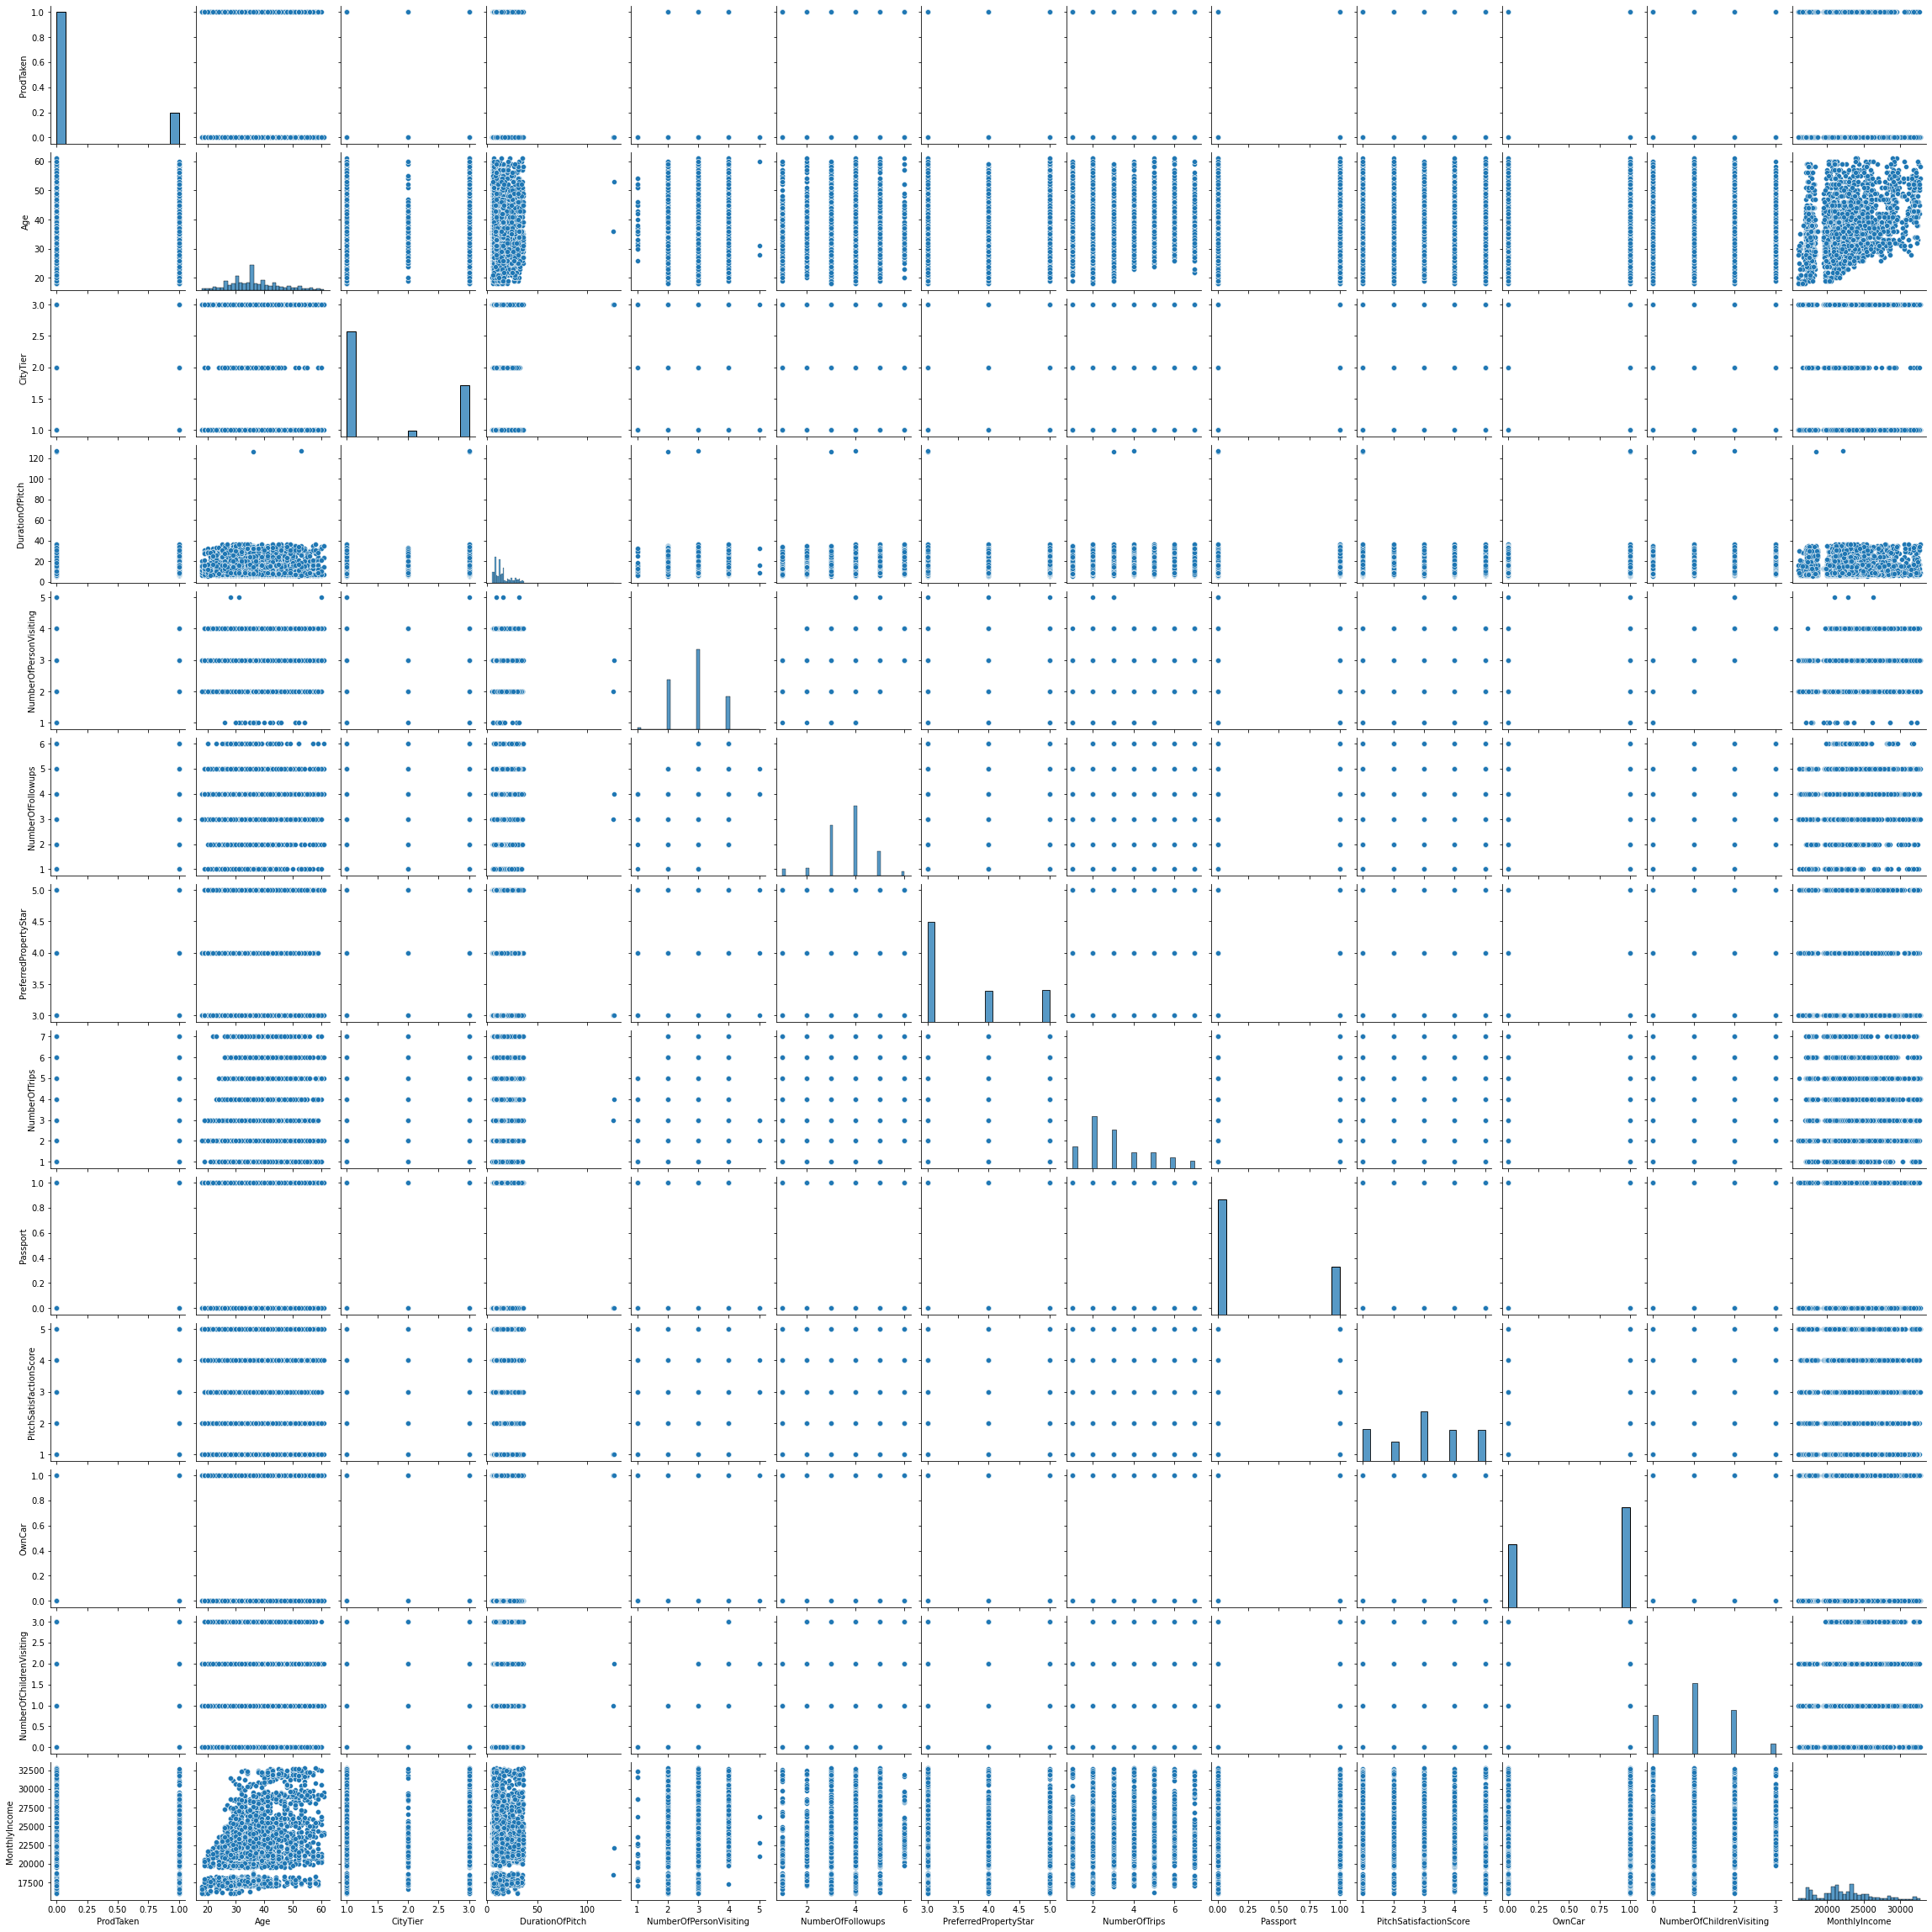

In [53]:
sns.pairplot(data)

- Age,Duration of Pitch,OwnCar,Monthly income,NumberOfPersonVisiting and no.of children visiting have very less correlation with ProdTaken(target).
- Age and Monthly income are high;y positively correlated.
- No.of person visiting and no.of children visiting are highly correlated.

## 3.Feature Reduction

In [54]:
X = data.drop(['ProdTaken','DurationOfPitch','ProductPitched','Age','MonthlyIncome','NumberOfChildrenVisiting'],axis=1)
y = data['ProdTaken']   
X.head()
X.shape

(4410, 13)

## 4. Doing Dummy encoding on the feature set.

In [55]:
Data_dummy_encoded=pd.get_dummies(X)
X=pd.DataFrame(Data_dummy_encoded)
X.shape

(4410, 25)

In [56]:
X.corr()

,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,TypeofContact_Company Invited,TypeofContact_Self Enquiry,...,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
CityTier,1.000000,-0.000008,0.019861,-0.008684,-0.018972,0.002527,-0.037789,-0.000045,0.014154,-0.013668,...,-0.009388,0.013152,-0.030508,-0.039555,0.071178,0.027797,-0.287076,0.229636,0.061426,0.030652
NumberOfPersonVisiting,-0.000008,1.000000,0.322779,0.030868,0.165288,0.012585,-0.018363,0.006137,0.007256,0.002401,...,-0.011400,0.022427,0.028582,-0.167649,0.117406,-0.082154,0.035634,-0.007233,0.009204,0.018126
NumberOfFollowups,0.019861,0.322779,1.000000,-0.022518,0.125010,0.013922,-0.004823,0.006025,0.019585,-0.014501,...,0.003375,-0.025224,-0.040412,-0.046705,0.135128,-0.074637,-0.004759,0.004082,0.042385,0.038632
PreferredPropertyStar,-0.008684,0.030868,-0.022518,1.000000,0.008575,0.002865,-0.021990,0.014933,-0.036673,0.038645,...,-0.021133,-0.004021,0.032701,-0.027163,-0.011830,-0.011669,-0.001473,-0.026487,0.042927,0.011226
NumberOfTrips,-0.018972,0.165288,0.125010,0.008575,1.000000,0.010183,-0.018708,-0.019382,-0.014736,0.015958,...,-0.006395,0.006659,0.048605,-0.087581,0.019774,0.028122,-0.064124,0.028305,0.031191,0.005301
Passport,0.002527,0.012585,0.013922,0.002865,0.010183,1.000000,0.016143,-0.017588,-0.007361,0.015275,...,-0.040048,0.004728,0.009498,0.002710,-0.021453,0.019407,0.022796,-0.027763,-0.007048,0.033090
PitchSatisfactionScore,-0.037789,-0.018363,-0.004823,-0.021990,-0.018708,0.016143,1.000000,0.078363,0.022801,-0.020329,...,0.008802,0.036163,-0.031672,0.013023,-0.009691,0.048698,0.010871,-0.029768,-0.005558,0.030366
OwnCar,-0.000045,0.006137,0.006025,0.014933,-0.019382,-0.017588,0.078363,1.000000,0.005167,-0.003790,...,-0.022095,0.034914,-0.011133,-0.027484,0.006943,0.042935,-0.043344,-0.002813,0.035148,0.016919
TypeofContact_Company Invited,0.014154,0.007256,0.019585,-0.036673,-0.014736,-0.007361,0.022801,0.005167,1.000000,-0.986549,...,-0.005066,-0.028265,-0.000700,0.016776,0.013922,0.004329,-0.032391,0.032465,-0.001384,-0.013794
TypeofContact_Self Enquiry,-0.013668,0.002401,-0.014501,0.038645,0.015958,0.015275,-0.020329,-0.003790,-0.986549,1.000000,...,0.004907,0.026584,-0.002401,-0.015915,-0.008662,-0.001494,0.032346,-0.037843,0.006840,0.013982


## II. EXPLORATORY DATA ANALYSIS

#### 1.Univariate Analysis

###### Histogram

Text(0.5, 1.0, 'Histogram of CityTier')

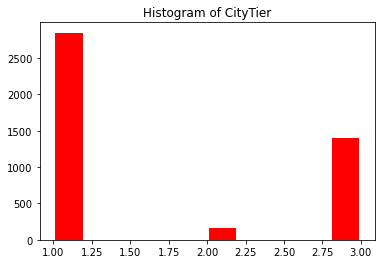

In [57]:
plt.hist(data['CityTier'],color='red',rwidth=0.9)
plt.title('Histogram of CityTier')

- The people from City Tier 1 are the majority in purchase of Package.

Text(0.5, 1.0, 'Histogram of MonthlyIncome')

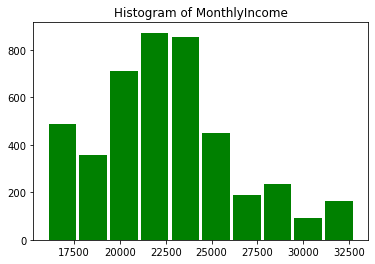

In [58]:
plt.hist(data['MonthlyIncome'],color='green',rwidth=0.9)
plt.title('Histogram of MonthlyIncome')

- Majority of people is having income between 20000 and 25000.

##### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x2847f2369d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2847f2460d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2847f236670>],
 'medians': [<matplotlib.lines.Line2D at 0x2847f246790>],
 'fliers': [<matplotlib.lines.Line2D at 0x2847f246af0>],
 'means': []}

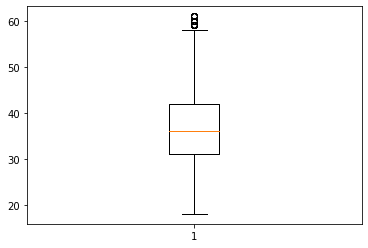

In [59]:
plt.boxplot(data['Age'])

- No outliers

### 2.Bivariate Analysis

**_Bargraph_**

<function matplotlib.pyplot.show(close=None, block=None)>

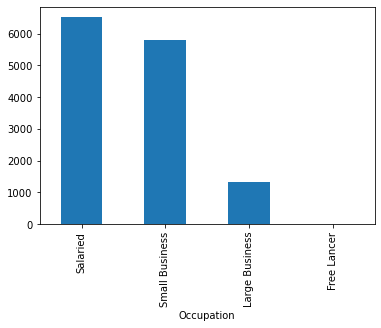

In [60]:
data.groupby('Occupation')['NumberOfTrips'].sum().nlargest(5).plot.bar()
plt.show

- The salaried ones took the greatest number of trips whereas the free lancer ones took the least.

##### Countplot

<AxesSubplot:xlabel='Gender', ylabel='count'>

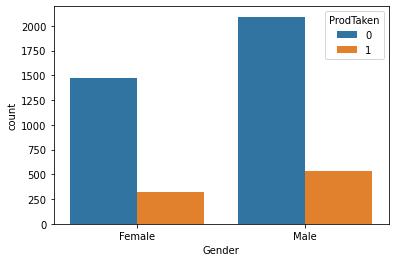

In [73]:
sns.countplot(x=data['Gender'],hue=data['ProdTaken'])

- Males has purchased the package more.

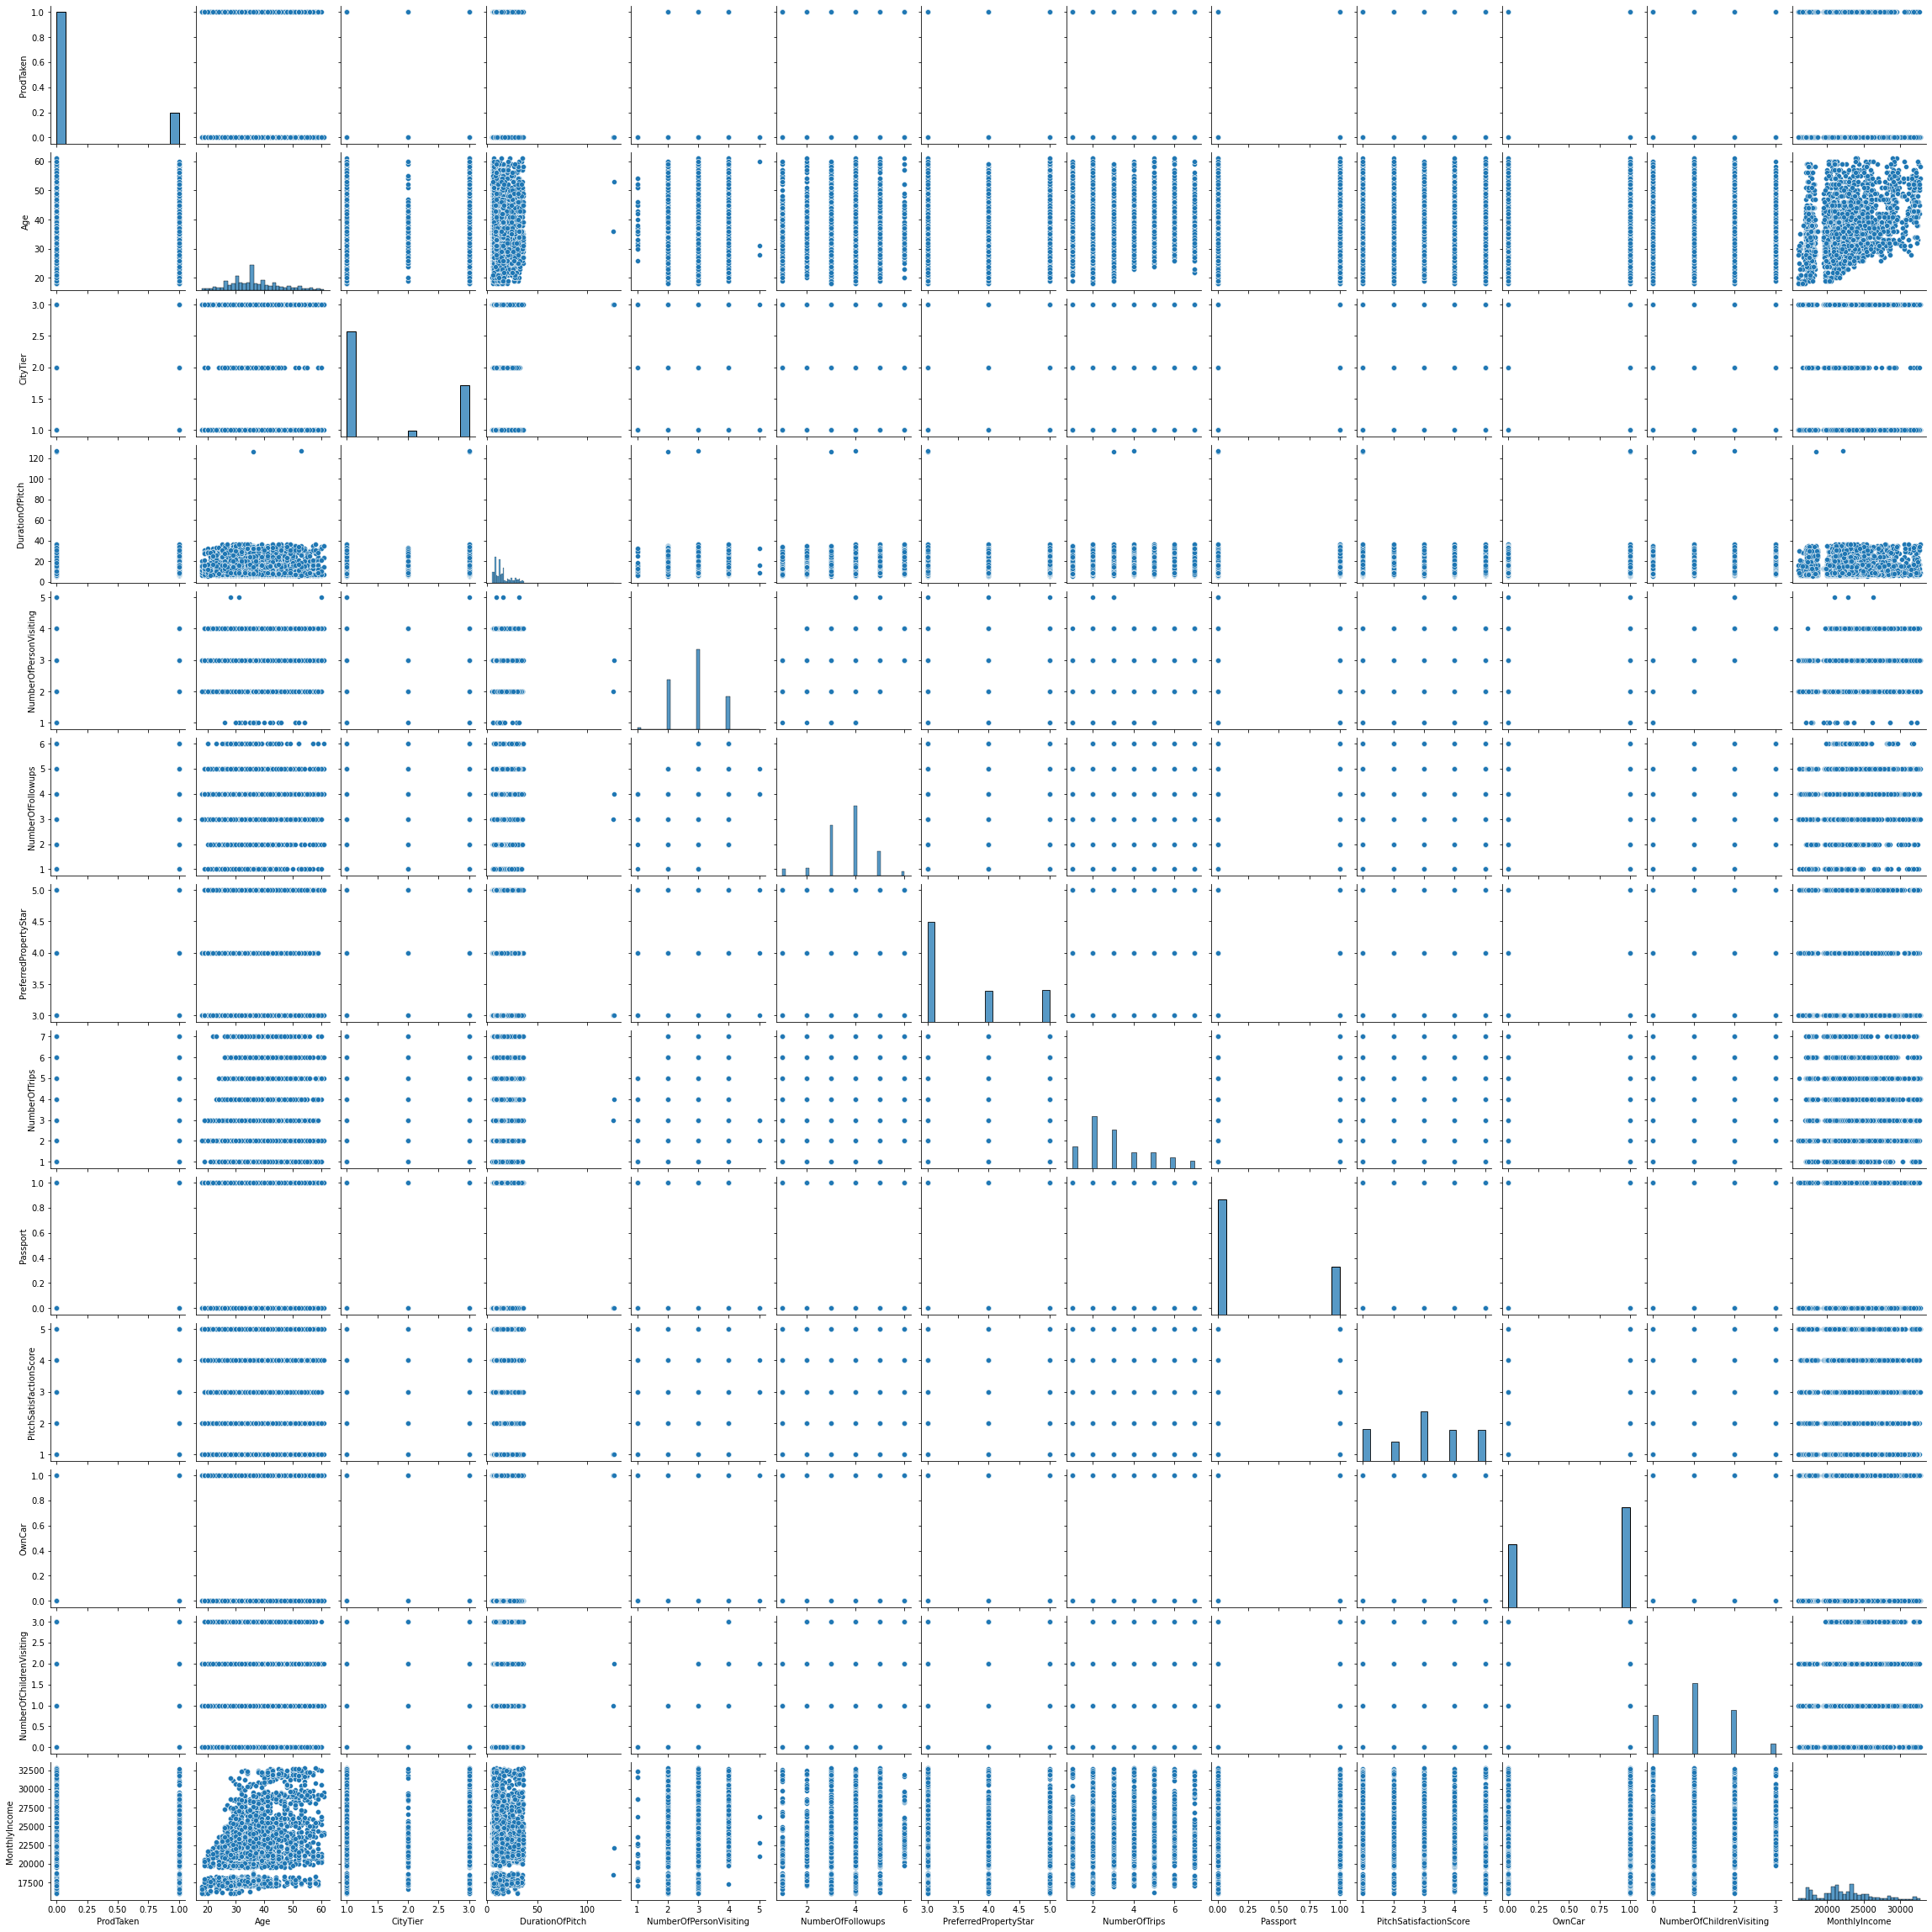

In [78]:
sns.pairplot(data)

## IV. MODEL

In [76]:
X.shape

(4410, 25)

In [71]:
y.shape

(4410,)

### 1.Logistic Regression

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [82]:
print('The Performance of Logistic regression is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) 
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of Logistic regression is:

Accuracy is: 0.8356009070294784
Precesion is: 0.6746987951807228
Recall is: 0.3218390804597701
f1_score is: 0.43579766536964976


In [83]:
confusion_matrix(y_test,y_pred)

array([[681,  27],
       [118,  56]], dtype=int64)

### 2. KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier 
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [86]:
print('The Performance of KNN is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of KNN is:

Accuracy is: 0.8866213151927438
Precesion is: 0.7936507936507936
Recall is: 0.5747126436781609
f1_score is: 0.6666666666666666


In [87]:
confusion_matrix(y_test,y_pred)

array([[682,  26],
       [ 74, 100]], dtype=int64)

### 3.Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier algorithm

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)


In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [90]:
print('The Performance of Decision Tree is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of Decision Tree is:

Accuracy is: 0.8877551020408163
Precesion is: 0.7071823204419889
Recall is: 0.735632183908046
f1_score is: 0.7211267605633802


In [91]:
confusion_matrix(y_test,y_pred)

array([[655,  53],
       [ 46, 128]], dtype=int64)

### 4.SVM

#### Linear classifier

In [92]:

from sklearn.svm import SVC

svm_linear =SVC(kernel ='linear')
svm_linear.fit(X_train,y_train)

y_pred = svm_linear.predict(X_test)


In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [97]:
print('The Performance of Linear svm is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of Linear svm is:

Accuracy is: 0.8356009070294784
Precesion is: 0.8536585365853658
Recall is: 0.20114942528735633
f1_score is: 0.3255813953488372


In [98]:
confusion_matrix(y_test,y_pred)

array([[702,   6],
       [139,  35]], dtype=int64)

#### Polynomial SVM

In [96]:
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
svm_poly.get_params()

y_pred = svm_poly.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [99]:
print('The Performance of Polynomial SVM is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) 
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of Polynomial SVM is:

Accuracy is: 0.8356009070294784
Precesion is: 0.8536585365853658
Recall is: 0.20114942528735633
f1_score is: 0.3255813953488372


In [100]:
confusion_matrix(y_test,y_pred)

array([[702,   6],
       [139,  35]], dtype=int64)

#### RBF SVM

In [101]:
svm_radial = SVC(kernel='rbf')

svm_radial.fit(X_train,y_train)
svm_radial.get_params()
y_pred = svm_radial.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [102]:
print('The Performance of RBF SVM is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) 
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of RBF SVM is:

Accuracy is: 0.8140589569160998
Precesion is: 1.0
Recall is: 0.05747126436781609
f1_score is: 0.10869565217391304


In [103]:
confusion_matrix(y_test,y_pred)

array([[708,   0],
       [164,  10]], dtype=int64)

### 5. Random Forest

In [105]:

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [107]:
print('The Performance of Random Forest is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))


The Performance of Random Forest is:

Accuracy is: 0.9183673469387755
Precision is: 0.9112903225806451
Recall is: 0.6494252873563219
f1_score is: 0.7583892617449665


In [108]:
confusion_matrix(y_test,y_pred)

array([[697,  11],
       [ 61, 113]], dtype=int64)

##### Random Forest is having high accuracy.

Accuracy is: 0.9070847851335656
Precision is: 0.8536585365853658
Recall is: 0.6287425149700598
f1_score is: 0.7241379310344828

## 5. MODE FINE TUNING of RANDOM FOREST MODEL

#### sklearn.ensemble.RandomForestClassifier

In [109]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## RandomizedSearchCV

- Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter. 
- Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [110]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 125, 150, 175, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


##### Random Search Training

In [117]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 125, 150, 175,
                                                         200]},
                   random_state=42, verbose=2)

In [118]:
rf_random.best_score_

0.8979591836734694

In [119]:

rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

#### Grid Search with Cross Validation

- We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.
- To use Grid Search, we make another grid based on the best values provided by random search:

In [120]:
rfc=RandomForestClassifier(n_estimators=150,min_samples_split=2, min_samples_leaf= 1,max_features='sqrt', max_depth= 90, bootstrap= False)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [121]:
print('The Performance of Random Forest after hyper parameter tuning is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))


The Performance of Random Forest after hyper parameter tuning is:

Accuracy is: 0.9183673469387755
Precision is: 0.8642857142857143
Recall is: 0.6954022988505747
f1_score is: 0.7707006369426752


##### Hence, we can find the performance of Random Forest Algorithm is improved after Hyper parameter tuning (RandomSearchCV and GridSearchCV).